Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [7]:
df= df.drop(columns='Unnamed: 32')

In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1.Choose a binary classification dataset.

In [10]:
x=df.drop(columns='diagnosis')
y=df['diagnosis']

2.Train/test split and standardize features.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (455, 31)
x_test shape: (114, 31)
y_train shape: (455,)
y_test shape: (114,)


3.Fit a Logistic Regression model.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("x_train_scaled shape:", x_train_scaled.shape)
print("x_test_scaled shape:", x_test_scaled.shape)

x_train_scaled shape: (455, 31)
x_test_scaled shape: (114, 31)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

4.Evaluate with confusion matrix, precision, reca l, ROC-AUC.

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Precision: 0.9761904761904762
Recall: 0.9534883720930233

ROC-AUC: 0.99737962659679


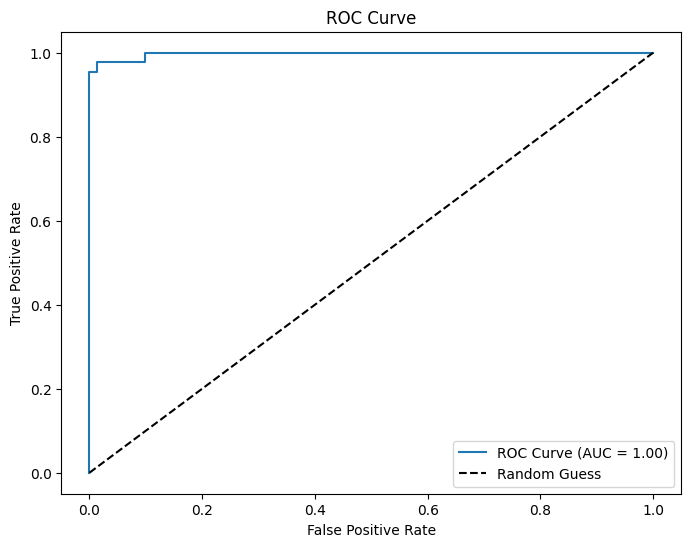

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision and Recall
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
print("\nPrecision:", precision)
print("Recall:", recall)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='M')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

5.Tune threshold and explain sigmoid function

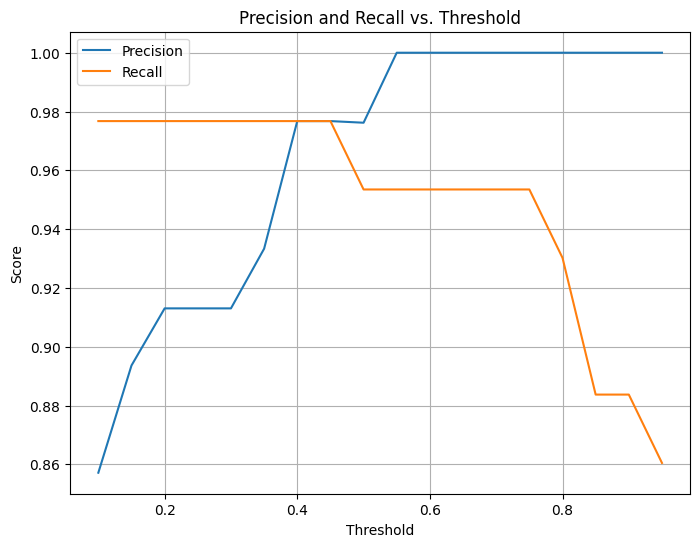


Evaluation with threshold = 0.4:
Confusion Matrix:
 [[70  1]
 [ 1 42]]
Precision: 0.9767441860465116
Recall: 0.9767441860465116


In [15]:
# Tune threshold and explain sigmoid function

# Explain sigmoid function (already done in Speak field)

# Tune threshold
# We can iterate through different thresholds and see how the metrics change
thresholds = np.arange(0.1, 1.0, 0.05)
precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_tuned = (y_pred_proba >= threshold).astype(int)
    # Convert y_test back to numerical for calculation
    y_test_numerical = y_test.apply(lambda x: 1 if x == 'M' else 0)
    precision = precision_score(y_test_numerical, y_pred_tuned)
    recall = recall_score(y_test_numerical, y_pred_tuned)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot precision and recall vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Example of evaluating with a specific tuned threshold (e.g., 0.4)
tuned_threshold = 0.4
y_pred_tuned_example = (y_pred_proba >= tuned_threshold).astype(int)
# Convert y_test back to numerical for calculation
y_test_numerical = y_test.apply(lambda x: 1 if x == 'M' else 0)


cm_tuned = confusion_matrix(y_test_numerical, y_pred_tuned_example)
precision_tuned = precision_score(y_test_numerical, y_pred_tuned_example)
recall_tuned = recall_score(y_test_numerical, y_pred_tuned_example)

print(f"\nEvaluation with threshold = {tuned_threshold}:")
print("Confusion Matrix:\n", cm_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)

**1.How does logistic regression differ from linear regression?**
Linear Regression: Used for predicting a continuous target variable (e.g., house prices, temperature). It models the relationship between the independent variables and the dependent variable using a straight line.
Logistic Regression: Used for predicting a categorical target variable (specifically, binary classification, where there are two possible outcomes). It models the probability of the outcome belonging to a particular class using the sigmoid function.

**2.What is the sigmoid function?**
 As we discussed before, the sigmoid function (also known as the logistic function) is an S-shaped curve that takes any real-valued number and maps it to a value between 0 and 1. In logistic regression, it transforms the linear output of the model into a probability.

**3.What is precision vs recall?**
 These are metrics used to evaluate the performance of a classification model, especially in situations with imbalanced classes:
Precision: Measures the accuracy of the positive predictions. It is the ratio of true positives to the total number of positive predictions (true positives + false positives). High precision means when the model predicts positive, it is usually correct.
Recall (Sensitivity): Measures the model's ability to find all the positive instances. It is the ratio of true positives to the total number of actual positives (true positives + false negatives). High recall means the model identifies most of the actual positive cases.

**4.What is the ROC-AUC curve?**
 ROC (Receiver Operating Characteristic) Curve: A graph that shows the performance of a binary classification model at different classification thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity).
AUC (Area Under the Curve): The area under the ROC curve. It provides a single scalar value that summarizes the model's ability to distinguish between the positive and negative classes. An AUC of 1 represents a perfect model, while an AUC of 0.5 represents a random guess.

**5.What is the confusion matrix?**
 A table that summarizes the performance of a classification model on a set of test data. It shows the number of:
True Positives (TP): Correctly predicted positive cases.
True Negatives (TN): Correctly predicted negative cases.
False Positives (FP): Incorrectly predicted positive cases (Type I error).
False Negatives (FN): Incorrectly predicted negative cases (Type II error).

**6.What happens if classes are imbalanced?**
 Class imbalance occurs when the number of instances in one class is significantly lower than the number of instances in the other class.
In such cases, a model might achieve high overall accuracy by simply predicting the majority class most of the time. However, it will perform poorly on the minority class, which is often the class of interest (e.g., detecting a rare disease).
Metrics like accuracy can be misleading with imbalanced data. It's important to use metrics like precision, recall, F1-score, and the confusion matrix to get a better understanding of the model's performance on both classes.

**7.How do you choose the threshold?**
 The choice of threshold depends on the specific problem and the relative costs of false positives and false negatives.
If the cost of a false negative is high (e.g., failing to detect a serious disease), you might choose a lower threshold to prioritize recall, even if it increases the number of false positives.
If the cost of a false positive is high (e.g., incorrectly flagging someone for fraud), you might choose a higher threshold to prioritize precision, even if it decreases recall.
The precision-recall plot you generated can help visualize the trade-off and guide your decision.

**8.Can logistic regression be used for multi-class problems?**
 While logistic regression is fundamentally a binary classification algorithm, it can be extended to handle multi-class problems using techniques like:
One-vs.-Rest (OvR): Train a separate binary logistic regression model for each class, where each model predicts whether an instance belongs to that class or not.
One-vs.-One (OvO): Train a separate binary logistic regression model for every pair of classes.
I hope these explanations are helpful! Let me know if you have any more questions or would like to proceed with further steps in your analysis.